In [3]:
import pandas as pd
import numpy as np

from sklearn import datasets, linear_model, model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import seaborn as sn

from matplotlib import pyplot as plt

In [4]:
raw_df = pd.read_csv('data_banknote_authentication.txt', ',')

raw_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
# shuffle the dataset

from sklearn.utils import shuffle
raw_df = shuffle(raw_df)

raw_df.head()

,variance,skewness,curtosis,entropy,class
871,-0.75793,2.5349,-3.0464,-1.262900,1
139,-0.20620,9.2207,-3.7044,-6.810300,0
364,5.78230,5.5788,-2.4089,-0.056479,0
201,4.00260,-3.5943,3.5573,0.268090,0
841,-3.88580,-12.8461,12.7957,-3.135300,1


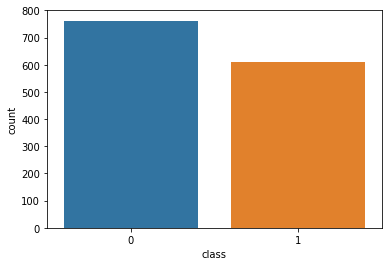

In [6]:
# split the data int x(training data) and y (results)

y = raw_df['class']
X = raw_df.drop(['class'], axis=1)
# X = pd.get_dummies(X, drop_first=True)
# y = pd.get_dummies(y, drop_first=True).values.ravel()

raw_df.groupby('class').count()

ax = sn.countplot(x="class", data=raw_df)
plt.show()

In [7]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)

(960, 4) (960,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000A00BE40DD8>,
      dtype=object)

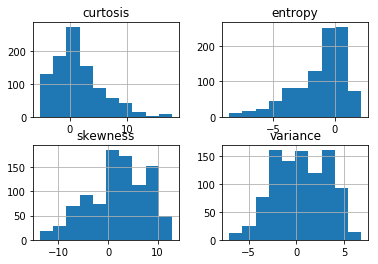

In [8]:
X_train.hist()

In [9]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [10]:
#### KNN Section

In [11]:
# Spot Check Algorithms
models = []
models.append(('euclidean', KNeighborsClassifier(metric='euclidean')))
models.append(('manhattan', KNeighborsClassifier(metric='manhattan')))
models.append(('chebyshev', KNeighborsClassifier(metric='chebyshev')))
models.append(('minkowski', KNeighborsClassifier(metric='minkowski')))
models.append(('hamming', KNeighborsClassifier(metric='hamming')))
models.append(('canberra', KNeighborsClassifier(metric='canberra')))
models.append(('braycurtis', KNeighborsClassifier(metric='braycurtis')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

euclidean: 1.000000 (0.000000)
manhattan: 0.997917 (0.006250)
chebyshev: 0.998958 (0.003125)
minkowski: 1.000000 (0.000000)
hamming: 0.469792 (0.067580)
canberra: 0.988542 (0.009827)
braycurtis: 1.000000 (0.000000)


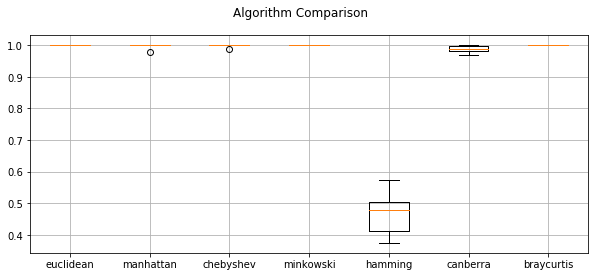

In [12]:
# Compare Algorithms
fig = plt.figure(figsize = (10,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [13]:
def param_selection(X, y, nfolds):
    
    Ks = range(1, 20)
    metrics = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
    param_grid = {'n_neighbors': Ks, 'metric' : metrics}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_

    print(grid_search.score(X, y))
    
    y_pred = grid_search.predict(X_test)
    print(accuracy_score(y_pred, y_test))
    
    return grid_search.best_params_

param_selection(X_train, y_train, 10)

1.0
0.9951456310679612


{'metric': 'euclidean', 'n_neighbors': 2}

[[213   1]
 [  0 198]]


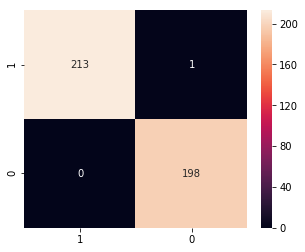

In [14]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

model = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm=confusion_matrix(y_test,y_pred)

print(cm)

df_cm = pd.DataFrame(cm, index = [i for i in "10"], columns = [i for i in "10"])
plt.figure(figsize = (5,4))
sn.heatmap(df_cm, annot=True, fmt='d')
plt.show()

In [15]:
target_names = ['class 1', 'class 0']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    class 1       1.00      1.00      1.00       214
    class 0       0.99      1.00      1.00       198

avg / total       1.00      1.00      1.00       412



In [16]:
### Neural Network Section

In [17]:
# Spot Check Algorithms
models = []
models.append(('relu', MLPClassifier(activation='relu',max_iter=1000)))
models.append(('logistic', MLPClassifier(activation='logistic',max_iter=1000)))
models.append(('tanh', MLPClassifier(activation='tanh',max_iter=1000)))
models.append(('identity', MLPClassifier(activation='identity',max_iter=1000)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

relu: 0.997917 (0.006250)
logistic: 0.984375 (0.012543)
tanh: 0.991667 (0.010206)
identity: 0.988542 (0.011831)


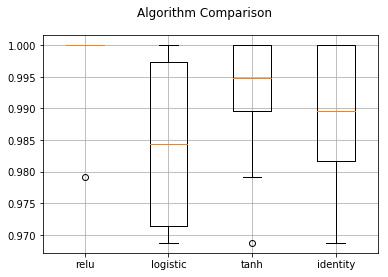

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.grid()
plt.show()

In [22]:
import time

# Spot Check Algorithms
models = []

xx = range(1,21)

for i in xx:
    models.append((str(i), MLPClassifier(activation='tanh',max_iter=10000,hidden_layer_sizes=(i,i,) )))

acc1 = []
acc2 = []
tim = []

# evaluate each model in turn
results = []
names = []
for name, model in models:
	start_time = time.time()
    
	kfold = model_selection.KFold(n_splits=10)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
	elapsed_time = time.time() - start_time
	tim.append(elapsed_time)
    
	results.append(cv_results)
    
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
	model.fit(X_train, y_train)
	s1 = model.score(X_train, y_train)
	acc1.append(s1)
	s2 = model.score(X_test, y_test)
	print(s1, s2)
    
	acc2.append(s2)

1: 0.989583 (0.010417)
0.9916666666666667 0.9805825242718447
2: 0.989583 (0.010417)
0.9916666666666667 0.9805825242718447
3: 0.992708 (0.008136)
0.99375 0.9878640776699029
4: 0.993750 (0.009547)
0.996875 0.9951456310679612
5: 0.994792 (0.008398)
0.9989583333333333 0.9951456310679612
6: 0.995833 (0.006910)
1.0 1.0
7: 0.996875 (0.006670)
1.0 1.0
8: 0.994792 (0.008398)
1.0 0.9975728155339806
9: 0.995833 (0.008333)
1.0 0.9975728155339806
10: 0.996875 (0.006670)
1.0 1.0
11: 0.996875 (0.006670)
0.9989583333333333 0.9951456310679612
12: 0.997917 (0.006250)
1.0 0.9975728155339806
13: 0.996875 (0.006670)
1.0 0.9975728155339806
14: 0.997917 (0.006250)
1.0 0.9975728155339806
15: 0.996875 (0.006670)
1.0 1.0
16: 0.996875 (0.006670)
1.0 0.9975728155339806
17: 0.996875 (0.006670)
1.0 1.0
18: 0.997917 (0.006250)
1.0 0.9975728155339806
19: 0.997917 (0.006250)
1.0 0.9975728155339806
20: 0.996875 (0.006670)
0.9989583333333333 0.9975728155339806


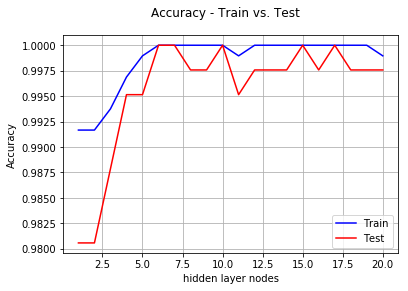

In [26]:
fig = plt.figure( figsize=(6,4) )
fig.suptitle('Accuracy - Train vs. Test')

plt.plot(xx, acc1, c='blue', label='Train')
plt.plot(xx, acc2, c='red', label='Test')

plt.xlabel('hidden layer nodes')
plt.ylabel('Accuracy')

plt.grid()
plt.legend(loc='best')
plt.show()

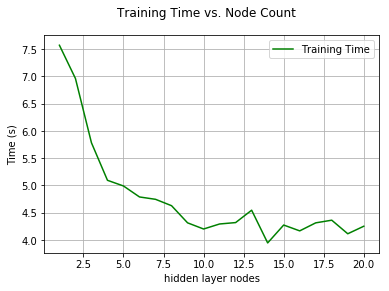

In [27]:
fig = plt.figure( figsize=(6,4) )
fig.suptitle('Training Time vs. Node Count')

plt.plot(xx, tim, c='green', label='Training Time')

plt.xlabel('hidden layer nodes')
plt.ylabel('Time (s)')

plt.grid()
plt.legend(loc='upper right')
plt.show()

In [42]:
model = MLPClassifier(activation='relu',max_iter=10000,hidden_layer_sizes=(10,10,) )

model.fit(X_train, y_train)

print ( 'Test: {0} , Train: {1}'.format(model.score(X_train, y_train), model.score(X_test, y_test)) )

Test: 1.0 , Train: 1.0
